#Read the xlsx file from Google Drive



In [ ]:
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/data.xlsx")

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
print("Number of rows and columns of dataframe:",df.shape[:])

Number of rows and columns of dataframe: (377719, 7)


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 49.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


#Copying the original dataframe to another dataframe

In [ ]:
df2=df.copy()

In [ ]:

df2

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...,...
377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
377716,2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18
377717,2020-08-07 12:10:00,908.5,916.33,-231.51,-218.09,906.2,-181.96


It can be observed that the column 'time' is given in datetime64[ns] format. 

It follows the format of YYYY-MM-DD HH:MM:SS

 All other columns are in "object" datatype.

In [ ]:
df2.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [ ]:
df2.isna().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

Converting the columns of object datatype into float64 datatype resulted in error as it contains non numeric values. Adding errors= 'coerce' ignore all non-numeric values. It will replace all non-numeric values with NaN

In [ ]:
df2["Cyclone_Inlet_Gas_Temp"]= pd.to_numeric(df.Cyclone_Inlet_Gas_Temp , errors='coerce')

In [ ]:
df2

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...,...
377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,2020-08-07 12:00:00,879.90,895.02,-228.04,-211.28,878.08,-176.94
377716,2020-08-07 12:05:00,887.20,895.7,-230.11,-214.65,885.32,-179.18
377717,2020-08-07 12:10:00,908.50,916.33,-231.51,-218.09,906.2,-181.96


In [ ]:
df2["Cyclone_Material_Temp"]= pd.to_numeric(df.Cyclone_Material_Temp  , errors='coerce')

In [ ]:
df2["Cyclone_Outlet_Gas_draft"]= pd.to_numeric(df.Cyclone_Outlet_Gas_draft  , errors='coerce')

In [ ]:
df2["Cyclone_cone_draft"]= pd.to_numeric(df.Cyclone_cone_draft  , errors='coerce')

In [ ]:
df2["Cyclone_Gas_Outlet_Temp"]= pd.to_numeric(df.Cyclone_Gas_Outlet_Temp   , errors='coerce')

In [ ]:
df2["Cyclone_Inlet_Draft"]= pd.to_numeric(df.Cyclone_Inlet_Draft   , errors='coerce')

In [ ]:
df2.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

Time column is set as index of dataframe


In [ ]:
df2['time'] = pd.to_datetime(df2['time'], format='%Y-%m-%d %H:%M:%S')
df2.set_index(['time'],inplace=True)


# Check the missing values

In [ ]:


df2.isnull().sum()

Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [ ]:
print(df2)

                     Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
time                                                                 
2017-01-01 00:00:00                  867.63                 910.42   
2017-01-01 00:05:00                  879.23                 918.14   
2017-01-01 00:10:00                  875.67                 924.18   
2017-01-01 00:15:00                  875.28                 923.15   
2017-01-01 00:20:00                  891.66                 934.26   
...                                     ...                    ...   
2020-08-07 11:55:00                  899.42                 919.79   
2020-08-07 12:00:00                  879.90                 895.02   
2020-08-07 12:05:00                  887.20                 895.70   
2020-08-07 12:10:00                  908.50                 916.33   
2020-08-07 12:15:00                  880.86                 905.31   

                     Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  \
time                

In [ ]:
df3=df2.copy()

Using pandas.dataframe.interpolate,missing values are interpolated using linear method


In [ ]:
df3=df3.interpolate(method ='linear', limit_direction ='forward') 

In [ ]:
df3.query("Cyclone_Material_Temp	!=Cyclone_Material_Temp	")

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,


In [ ]:
df3.isnull().sum()

Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

The observations are recorded in over 370k with each observation is recorded within 5 minutes. The dataset needs to be downsampled to reduce the frequency of observations so it can undergo Adfuller Dickey Test for stationarity check

The observation is downsampled to a daily frequency

In [ ]:
df3=df3.resample('4H')

In [ ]:
print(df3)

DatetimeIndexResampler [freq=<4 * Hours>, axis=0, closed=left, label=left, convention=start, origin=start_day]


In [ ]:
interpolated = df3.interpolate(method='linear')
interpolated

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
2017-01-01 04:00:00,867.31,946.88,-175.76,-153.91,878.19,-134.76
2017-01-01 08:00:00,876.41,911.41,-175.91,-171.55,862.48,-144.66
2017-01-01 12:00:00,867.67,940.05,-176.64,-145.80,862.81,-136.29
2017-01-01 16:00:00,887.87,952.50,-177.52,-177.36,880.50,-137.38
...,...,...,...,...,...,...
2020-08-06 20:00:00,878.99,888.85,-230.51,-210.75,876.16,-182.26
2020-08-07 00:00:00,929.69,958.72,-220.10,-185.68,934.05,-170.11
2020-08-07 04:00:00,883.08,901.36,-226.58,-199.38,882.61,-173.07


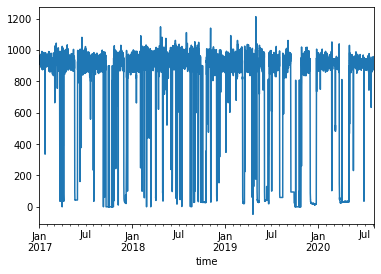

In [ ]:
interpolated['Cyclone_Material_Temp'].plot()

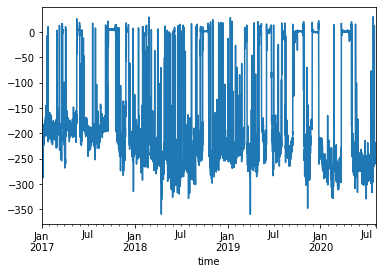

In [ ]:
interpolated['Cyclone_Outlet_Gas_draft'].plot()

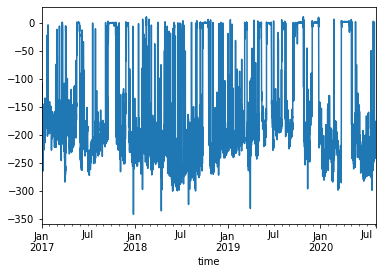

In [ ]:
interpolated['Cyclone_cone_draft'].plot()

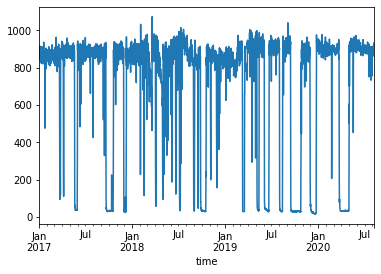

In [ ]:
interpolated['Cyclone_Gas_Outlet_Temp'].plot()

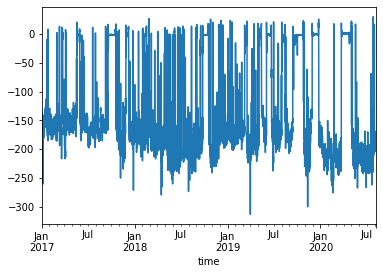

In [ ]:
interpolated['Cyclone_Inlet_Draft'].plot()

In [ ]:
interpolated.shape

(7888, 6)

In [ ]:
df2.shape

(377719, 6)

**Check stationarity of time series using Adfuller Dickey test**

In [ ]:
from statsmodels.tsa.stattools import adfuller
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
interpolated.columns

Index(['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'],
      dtype='object')

In [ ]:
interpolated_diff=interpolated.diff()

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [ ]:
interpolated_diff.dropna(inplace = True)

In [ ]:

for name, column in interpolated_diff[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']].iteritems():
    Augmented_Dickey_Fuller_Test_func(interpolated_diff[name], name)
    print('\n')

Results of Dickey-Fuller Test for column: Cyclone_Inlet_Gas_Temp
Test Statistic                  -26.461580
p-value                           0.000000
No Lags Used                     12.000000
Number of Observations Used    7874.000000
Critical Value (1%)              -3.431181
Critical Value (5%)              -2.861907
Critical Value (10%)             -2.566965
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Cyclone_Material_Temp
Test Statistic                  -26.715587
p-value                           0.000000
No Lags Used                     15.000000
Number of Observations Used    7871.000000
Critical Value (1%)              -3.431181
Critical Value (5%)              -2.861907
Critical Value (10%)             -2.566965
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Cyclone_Outlet_Gas_draft
Test Statistic                  -19.559011

In [ ]:
X = interpolated_diff[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']]
train, test = X[0:5500], X[5500:]

In [ ]:
interpolated_diff

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 04:00:00,-0.32,36.46,13.78,32.13,26.06,11.14
2017-01-01 08:00:00,9.10,-35.47,-0.15,-17.64,-15.71,-9.90
2017-01-01 12:00:00,-8.74,28.64,-0.73,25.75,0.33,8.37
2017-01-01 16:00:00,20.20,12.45,-0.88,-31.56,17.69,-1.09
2017-01-01 20:00:00,-4.25,-19.65,-7.63,-3.20,-25.13,-11.06
...,...,...,...,...,...,...
2020-08-06 20:00:00,-20.77,-36.41,-11.22,-9.83,-30.94,-11.57
2020-08-07 00:00:00,50.70,69.87,10.41,25.07,57.89,12.15
2020-08-07 04:00:00,-46.61,-57.36,-6.48,-13.70,-51.44,-2.96


In [ ]:
train.shape

(5500, 6)

In [ ]:
pq = []

In [ ]:
for name, column in train[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']].iteritems():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(train[name])
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : Cyclone_Inlet_Gas_Temp
optimal order for:Cyclone_Inlet_Gas_Temp is: (2, 0, 2) 


Searching order of p and q for : Cyclone_Material_Temp
optimal order for:Cyclone_Material_Temp is: (2, 0, 1) 


Searching order of p and q for : Cyclone_Outlet_Gas_draft
optimal order for:Cyclone_Outlet_Gas_draft is: (2, 0, 1) 


Searching order of p and q for : Cyclone_cone_draft
optimal order for:Cyclone_cone_draft is: (4, 0, 2) 


Searching order of p and q for : Cyclone_Gas_Outlet_Temp
optimal order for:Cyclone_Gas_Outlet_Temp is: (0, 0, 3) 


Searching order of p and q for : Cyclone_Inlet_Draft
optimal order for:Cyclone_Inlet_Draft is: (2, 0, 2) 




In [ ]:
def inverse_diff(actual_interpolated,pred_interpolated):
    interpolated_res=pred_interpolated.copy()
    columns=actual_interpolated.columns
    for col in columns:
      interpolated_res[str(col)+'_1st_inv_diff']=actual_interpolated[col].iloc[-1]+ interpolated_res[str(col)].cumsum()
    return interpolated_res

In [ ]:
results_temp=pd.DataFrame(columns=['p','q','RMSE Cyclone_Inlet_Gas_Temp','RMSE Cyclone_Material_Temp',
       'RMSE Cyclone_Outlet_Gas_draft', 'RMSE Cyclone_cone_draft',
       'RMSE Cyclone_Gas_Outlet_Temp', 'RMSE Cyclone_Inlet_Draft'])

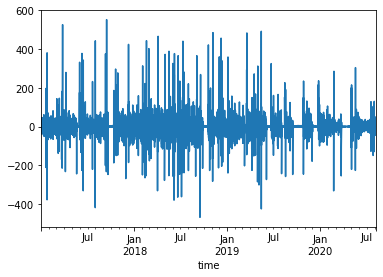

In [ ]:
interpolated_diff['Cyclone_Inlet_Gas_Temp'].plot()

In [ ]:
import numpy as np

In [ ]:
from timeit import default_timer as timer
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn import metrics

In [ ]:
print('Grid Search')
start=timer()
for i in pq:
     if i[0]== 0 and i[2]==0:
       pass
     else:
      print(f'Running for {i}')
      print(f'{i[0],i[2]}')
      model=VARMAX(train[['Cyclone_Inlet_Gas_Temp','Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft','Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']], order=(i[0],i[2]),enforce_stationarity=True).fit(disp=False)
      result=model.forecast(steps=2387)
      inv_res=inverse_diff(test[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft','Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']],result)
      InletGasTempRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_Inlet_Gas_Temp'],inv_res.Cyclone_Inlet_Gas_Temp_1st_inv_diff))
      MaterialTempRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_Material_Temp'],inv_res.Cyclone_Material_Temp_1st_inv_diff))
      OutletGasdraftRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_Outlet_Gas_draft'],inv_res.Cyclone_Outlet_Gas_draft_1st_inv_diff))
      ConedraftRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_cone_draft'],inv_res.Cyclone_cone_draft_1st_inv_diff))
      GasOutletTempRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_Gas_Outlet_Temp'],inv_res.Cyclone_Gas_Outlet_Temp_1st_inv_diff))
      InletDraftRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_Inlet_Draft'],inv_res.Cyclone_Inlet_Draft_1st_inv_diff))
      results_temp=results_temp.append({'p':i[0],'q':i[2],'RMSE Cyclone_Inlet_Gas_Temp':InletGasTempRMSE,'RMSE Cyclone_Material_Temp':MaterialTempRMSE,'RMSE Cyclone_Outlet_Gas_draft':OutletGasdraftRMSE, 'RMSE Cyclone_cone_draft':ConedraftRMSE,'RMSE Cyclone_Gas_Outlet_Temp':GasOutletTempRMSE, 'RMSE Cyclone_Inlet_Draft': InletDraftRMSE},ignore_index=True)
end=timer()
print(f'Total time taken to complete grid search in seconds:{(end-start)}')      

Grid Search
Running for (2, 0, 2)
(2, 2)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Running for (2, 0, 1)
(2, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Running for (2, 0, 1)
(2, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Running for (4, 0, 2)
(4, 2)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Running for (0, 0, 3)
(0, 3)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Running for (2, 0, 2)
(2, 2)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Total time taken to complete grid search in seconds:4209.694123806999


In [ ]:
pq

In [ ]:
print('Grid Search')
start=timer()
for i in pq:
     if i[0]== 0 and i[2]==0:
       pass
     else:
      print(f'Running for {i}')
      print(f'{i[0],i[2]}')
      model=VARMAX(train[['Cyclone_Inlet_Gas_Temp','Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft','Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']], order=(i[0],i[2])).fit(disp=False)
      result=model.forecast(steps=2388)
      InletGasTempRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_Inlet_Gas_Temp'],result['Cyclone_Inlet_Gas_Temp']))
      MaterialTempRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_Material_Temp'],result['Cyclone_Material_Temp']))
      OutletGasdraftRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_Outlet_Gas_draft'],result['Cyclone_Outlet_Gas_draft']))
      ConedraftRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_cone_draft'],result['Cyclone_cone_draft']))
      GasOutletTempRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_Gas_Outlet_Temp'],result['Cyclone_Gas_Outlet_Temp']))
      InletDraftRMSE=np.sqrt(metrics.mean_squared_error(test['Cyclone_Inlet_Draft'],result['Cyclone_Inlet_Draft']))
      results_temp=results_temp.append({'p':i[0],'q':i[2],'RMSE Cyclone_Inlet_Gas_Temp':InletGasTempRMSE,'RMSE Cyclone_Material_Temp':MaterialTempRMSE,'RMSE Cyclone_Outlet_Gas_draft':OutletGasdraftRMSE, 'RMSE Cyclone_cone_draft':ConedraftRMSE,'RMSE Cyclone_Gas_Outlet_Temp':GasOutletTempRMSE, 'RMSE Cyclone_Inlet_Draft': InletDraftRMSE},ignore_index=True)
end=timer()
print(f'Total time taken to complete grid search in seconds:{(end-start)}')      

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
results_temp.sort_values(by=['RMSE Cyclone_Inlet_Gas_Temp','RMSE Cyclone_Material_Temp',
       'RMSE Cyclone_Outlet_Gas_draft', 'RMSE Cyclone_cone_draft',
       'RMSE Cyclone_Gas_Outlet_Temp', 'RMSE Cyclone_Inlet_Draft'])

,p,q,RMSE Cyclone_Inlet_Gas_Temp,RMSE Cyclone_Material_Temp,RMSE Cyclone_Outlet_Gas_draft,RMSE Cyclone_cone_draft,RMSE Cyclone_Gas_Outlet_Temp,RMSE Cyclone_Inlet_Draft
4,0.0,3.0,37.388640,82.158072,31.825892,29.123257,47.249716,25.473447
1,2.0,1.0,38.333957,81.869476,29.360220,27.457770,48.010289,23.832342
2,2.0,1.0,38.333957,81.869476,29.360220,27.457770,48.010289,23.832342
0,2.0,2.0,38.607874,81.899837,32.303426,27.998630,49.005946,26.001792
5,2.0,2.0,38.607874,81.899837,32.303426,27.998630,49.005946,26.001792
3,4.0,2.0,42.189460,82.658074,33.805652,28.977727,55.515530,27.146840


In [ ]:
# from above example we can see that p=0 and q=2 gives least RMSE
model = VARMAX(train[[ 'Cyclone_Inlet_Gas_Temp','Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft','Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft' ]], order=(0,3)).fit(disp=False)
result = model.forecast(steps = 2388)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
 result

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
2019-07-06 16:00:00,873.383781,903.538535,-209.574685,-179.944976,889.765037,-164.699377
2019-07-06 20:00:00,869.884309,898.684569,-209.858380,-181.494105,881.873506,-165.381607
2019-07-07 00:00:00,866.201428,894.649636,-208.851492,-183.018275,874.985486,-164.758211
2019-07-07 04:00:00,862.716672,891.038375,-207.972339,-184.158388,868.392426,-164.248022
2019-07-07 08:00:00,859.345097,887.589360,-207.085963,-185.065891,862.315739,-163.705167
...,...,...,...,...,...,...
2020-08-06 20:00:00,750.954566,778.610645,-176.256690,-168.492780,732.715049,-140.919141
2020-08-07 00:00:00,750.954566,778.610645,-176.256690,-168.492780,732.715049,-140.919141
2020-08-07 04:00:00,750.954566,778.610645,-176.256690,-168.492780,732.715049,-140.919141
2020-08-07 08:00:00,750.954566,778.610645,-176.256690,-168.492780,732.715049,-140.919141


In [ ]:
test

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2019-07-06 16:00:00,923.60,961.08,-198.84,-157.57,923.68,-153.92
2019-07-06 20:00:00,887.22,918.20,-174.29,-135.03,887.40,-133.84
2019-07-07 00:00:00,871.43,902.32,-175.60,-127.25,901.54,-142.33
2019-07-07 04:00:00,874.62,906.38,-199.16,-141.16,902.00,-155.58
2019-07-07 08:00:00,865.21,894.44,-190.15,-134.74,891.96,-153.81
...,...,...,...,...,...,...
2020-08-06 20:00:00,878.99,888.85,-230.51,-210.75,876.16,-182.26
2020-08-07 00:00:00,929.69,958.72,-220.10,-185.68,934.05,-170.11
2020-08-07 04:00:00,883.08,901.36,-226.58,-199.38,882.61,-173.07


In [ ]:
res = inverse_diff(test[['Cyclone_Inlet_Gas_Temp','Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft','Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft' ]],result)

In [ ]:
res

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Cyclone_Inlet_Gas_Temp_1st_inv_diff,Cyclone_Material_Temp_1st_inv_diff,Cyclone_Outlet_Gas_draft_1st_inv_diff,Cyclone_cone_draft_1st_inv_diff,Cyclone_Gas_Outlet_Temp_1st_inv_diff,Cyclone_Inlet_Draft_1st_inv_diff
2019-07-06 16:00:00,873.383781,903.538535,-209.574685,-179.944976,889.765037,-164.699377,1.753284e+03,1.798559e+03,-437.614685,-391.224976,1.767845e+03,-341.639377
2019-07-06 20:00:00,869.884309,898.684569,-209.858380,-181.494105,881.873506,-165.381607,2.623168e+03,2.697243e+03,-647.473065,-572.719081,2.649719e+03,-507.020984
2019-07-07 00:00:00,866.201428,894.649636,-208.851492,-183.018275,874.985486,-164.758211,3.489370e+03,3.591893e+03,-856.324557,-755.737356,3.524704e+03,-671.779195
2019-07-07 04:00:00,862.716672,891.038375,-207.972339,-184.158388,868.392426,-164.248022,4.352086e+03,4.482931e+03,-1064.296896,-939.895743,4.393096e+03,-836.027217
2019-07-07 08:00:00,859.345097,887.589360,-207.085963,-185.065891,862.315739,-163.705167,5.211431e+03,5.370520e+03,-1271.382859,-1124.961634,5.255412e+03,-999.732384
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-06 20:00:00,750.954566,778.610645,-176.256690,-168.492780,732.715049,-140.919141,1.795691e+06,1.861682e+06,-421711.075490,-402919.309558,1.752502e+06,-337105.254811
2020-08-07 00:00:00,750.954566,778.610645,-176.256690,-168.492780,732.715049,-140.919141,1.796442e+06,1.862461e+06,-421887.332180,-403087.802338,1.753234e+06,-337246.173952
2020-08-07 04:00:00,750.954566,778.610645,-176.256690,-168.492780,732.715049,-140.919141,1.797192e+06,1.863239e+06,-422063.588870,-403256.295117,1.753967e+06,-337387.093094
2020-08-07 08:00:00,750.954566,778.610645,-176.256690,-168.492780,732.715049,-140.919141,1.797943e+06,1.864018e+06,-422239.845560,-403424.787897,1.754700e+06,-337528.012235


In [ ]:
'Cyclone_Inlet_Gas_Temp','Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft','Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'

('Cyclone_Inlet_Gas_Temp',
 'Cyclone_Material_Temp',
 'Cyclone_Outlet_Gas_draft',
 'Cyclone_cone_draft',
 'Cyclone_Gas_Outlet_Temp',
 'Cyclone_Inlet_Draft')

In [ ]:
for i in ['Cyclone_Inlet_Gas_Temp','Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft','Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[i] , res[str(i)+'_1st_inv_diff'])

Cyclone_Inlet_Gas_Temp


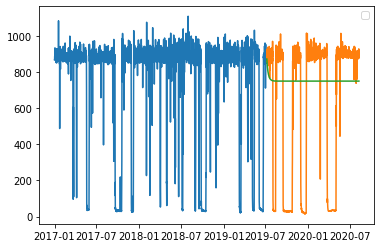

Cyclone_Material_Temp


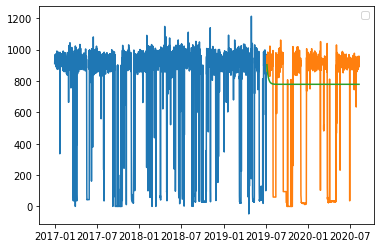

Cyclone_Outlet_Gas_draft


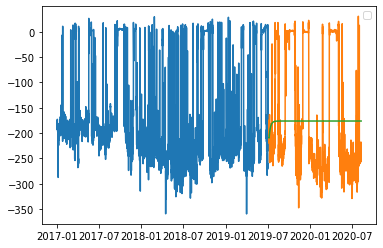

Cyclone_cone_draft


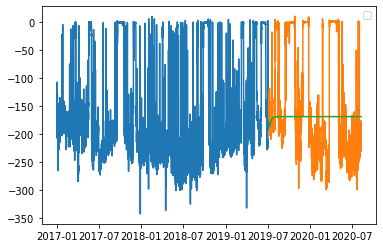

Cyclone_Gas_Outlet_Temp


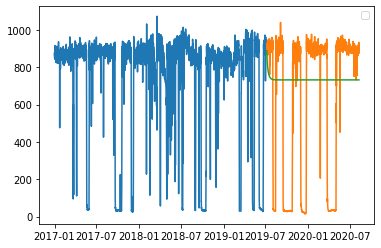

Cyclone_Inlet_Draft


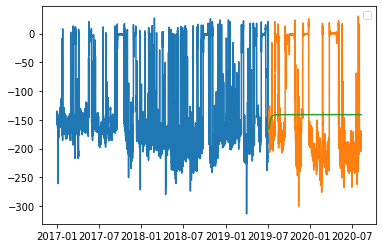

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['Cyclone_Inlet_Gas_Temp','Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft','Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft' ]:
    print(i)

    plt.plot(train[i])
    plt.plot(test[i])
    plt.plot(res[i])
    plt.legend(loc='best')
    plt.show()

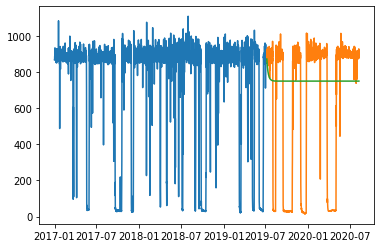

In [ ]:
plt.plot(train['Cyclone_Inlet_Gas_Temp'])
plt.plot(test['Cyclone_Inlet_Gas_Temp'])
plt.plot(result['Cyclone_Inlet_Gas_Temp'])

In [ ]:
plt.[lot]

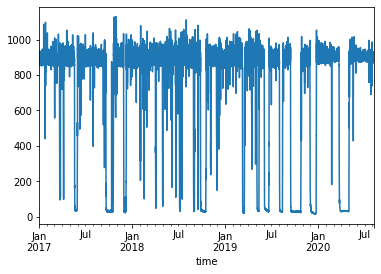

In [ ]:
interpolated['Cyclone_Inlet_Gas_Temp'].plot()